In [1]:
import dukit
import os
import numpy as np
# use gui backend
%matplotlib tk

/home/samsc/src/qs/dukit/src/dukit/driftcorrect.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
here = os.getcwd()
with open(
    os.path.dirname(here) + "/TEST_DATA_PATH.py", encoding="utf-8"
) as fid:
    exec(fid.read())  # reads in TEST_DATA_PATH string
DIR = TEST_DATA_PATH + "mz_test/"

In [3]:
np_text_file_path = DIR + "ODMR - Pulsed_10_Rectangle_bin_8/field/sig_sub_ref/sig_sub_ref_bnv_0.txt"
json_output_path = DIR + "polys_mz_sandbox.json"
json_input_path = DIR + "polys.json"
mean_plus_minus = 0.25

pgon_patch = {
    "facecolor": None,
    "edgecolor": "xkcd:grass green",
    "linestyle": "dashed",
    "fill": False,
    "linewidth": 2,
}

In [4]:
mesh_size = 512
height = 290e-9
res = 700e-9
fov_size = 30e-6

In [5]:
sim = dukit.SandboxMagSim((mesh_size, mesh_size), (fov_size, fov_size))

# import some polygons as a template
sim.add_template_polygons(json_input_path) 

In [6]:
# now adjust the template (shift + mouse to move, r + scroll to resize, for example)
# close window to continue
sim.adjust_template(output_path=json_output_path)
sim.set_template_as_polygons()

before
after


In [7]:
sim.set_template_as_polygons()

In [26]:
# return to inline plots
%matplotlib inline

defining magnets...:   0%|          | 0/1 [00:00<?, ?polygons/s]

(<Figure size 640x480 with 4 Axes>,
 array([<Axes: title={'center': 'sum'}>,
        <Axes: title={'center': '(0.0, 1.0, 0.0)'}>], dtype=object))

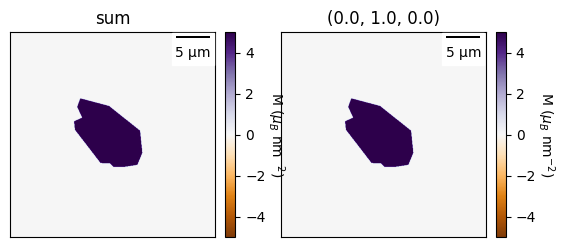

In [27]:
sim.define_magnets(5, (0, 1, 0))  # mag unit: mu_b/nm^2
_ = sim.plot_magsim_magnetizations(annotate_polygons=True, polygon_patch_params=pgon_patch)

In [28]:
sim.run(
    height, pad_mode="constant", resolution=res
)  # height: 'PX' equivalent in z, res the same


propagating stray field...:   0%|          | 0/1 [00:00<?, ?mag. unit vectors/s]

In [29]:
unv = [np.sqrt(1 / 3), np.sqrt(1 / 3), np.sqrt(1 / 3)]

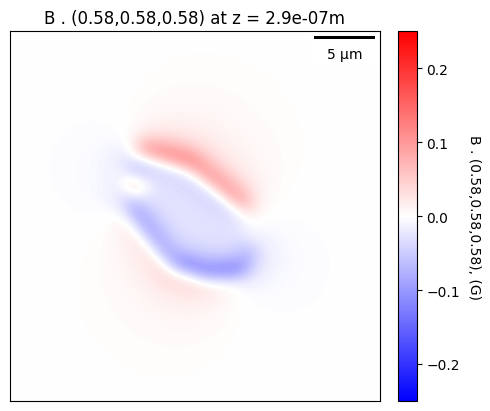

In [30]:
_ = sim.plot_magsim_bfield_at_nvs(strict_range=(-0.25, 0.25), projection=unv)

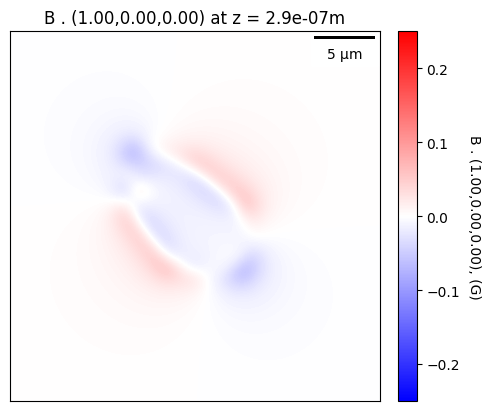

In [31]:
_ = sim.plot_magsim_bfield_at_nvs(strict_range=(-0.25, 0.25), projection=(1, 0, 0))

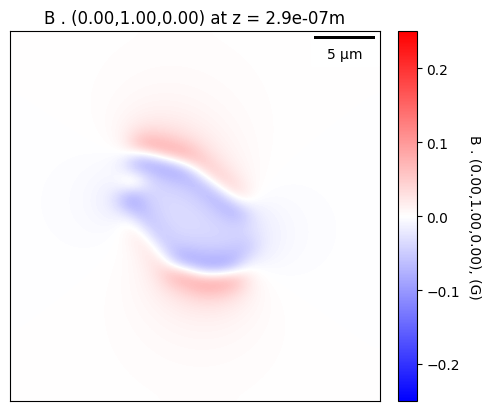

In [32]:
_ = sim.plot_magsim_bfield_at_nvs(strict_range=(-0.25, 0.25), projection=(0, 1, 0))

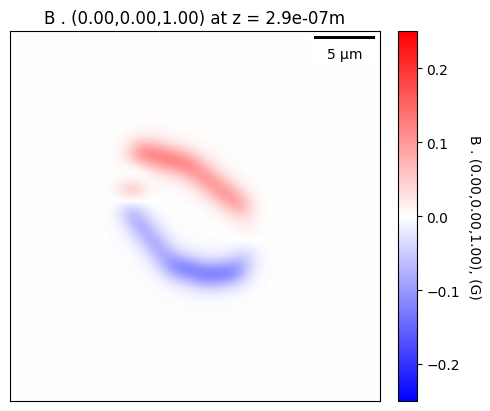

In [33]:
_ = sim.plot_magsim_bfield_at_nvs(strict_range=(-0.25, 0.25), projection=(0, 0, 1))